In [1]:
%load_ext autoreload
%autoreload 2
%load_ext notexbook

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import sys
sys.path.append("..")
from tqdm import tqdm
import networkx as nx

plt.style.use("../config/custom_plt.mplstyle")

In [2]:
%texify --code-font-family Monaco --linespread 1.2 --code-font-size 13

#### A measure of the homophily in a graph is taken from https://arxiv.org/pdf/2002.05287.pdf and https://arxiv.org/pdf/2202.07082.pdf


For a graph $\mathcal{G} = (\mathcal{V}, \mathcal{E})$ the measure of homophily for node can be defined as
$$
\mathcal{H}_{\mathrm{node}} = \frac{1}{|\mathcal{V}|}\sum_{v \in \mathcal{V}} \frac{|\{u \in \mathcal{N}(v): y_v = y_u\}|}{|\mathcal{N}(v)|}
$$
and it the average proportion of the neighbours with the same class of each node. Whereas for edge can be defined as
$$
\mathcal{H}_{\mathrm{edge}} = \frac{|\{(u, v) \in \mathcal{E}: y_v = y_u \}|}{|\mathcal{E}|}
$$


In [3]:
def compute_node_homophily(g, label_dict):
    H_node = 0
    for n in tqdm(g.nodes()):
        node_label = label_dict[n]
        total = 0
        node_neighbours = list(g.neighbors(n))
        for nn in node_neighbours:
            neighbour_label = label_dict[nn]
            if neighbour_label == node_label:
                total += 1
        H_node += total / len(node_neighbours)
    return H_node / nx.number_of_nodes(g)

def compute_edge_homophily(g, label_dict):
    H_edge = 0
    for u, v in tqdm(g.edges()):
        if label_dict[u] == label_dict[v]:
            H_edge += 1
    return H_edge / nx.number_of_edges(g)

In [4]:
citeseer_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/citeseer_GC_fixed.edge")
citeseer_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/citeseer.content", header=None, sep="\s+", low_memory=False)
citeseer_labels = pd.DataFrame()
citeseer_labels['index'] = citeseer_features.iloc[:, 0].astype(str)
citeseer_labels['label'] = citeseer_features.iloc[:, -1]
citeseer_labels_dict = dict(citeseer_labels.values) # key = index, value = label

In [5]:
cora_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/cora_GC.edge")
cora_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/cora.content", header=None, sep="\s+", low_memory=False)
cora_labels = pd.DataFrame()
cora_labels['index'] = cora_features.iloc[:, 0].astype(str)
cora_labels['label'] = cora_features.iloc[:, -1]
cora_labels_dict = dict(cora_labels.values)

In [6]:
film_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film/out1_graph_edges.edge")
film_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film/out1_node_feature_label.txt", sep="\s+")
film_labels = pd.DataFrame()
film_labels['index'] = film_features['node_id'].astype(str)
film_labels['label'] = film_features['label']
film_labels_dict = dict(film_labels.values)

In [7]:
dblp_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/dblp_pprefp/eS1/dblp_pprefp_GC.edge")
dblp_labels = np.loadtxt("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/dblp_label.txt")
dblp_labels = np.argmax(dblp_labels, axis=1)
dblp_labels_dict = pd.DataFrame()
dblp_labels_dict['label'] = dblp_labels
dblp_labels_dict = dblp_labels_dict.reset_index()
dblp_labels_dict['index'] = dblp_labels_dict['index'].astype(str)
dblp_labels_dict = dict(dblp_labels_dict.values)

In [8]:
imdb_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/imdb_mam/eS1/imdb_mam_GC.edge")
imdb_labels = np.loadtxt("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/imdb_label.txt")
imdb_labels = np.argmax(imdb_labels, axis=1)
imdb_labels_dict = pd.DataFrame()
imdb_labels_dict['label'] = imdb_labels
imdb_labels_dict = imdb_labels_dict.reset_index()
imdb_labels_dict['index'] = imdb_labels_dict['index'].astype(str)
imdb_labels_dict = dict(imdb_labels_dict.values)

In [9]:
acm_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/acm/acm_pap/eS1/acm_pap_GC.edge")
acm_labels = np.loadtxt("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/acm/acm_label.txt")
acm_labels = np.argmax(acm_labels, axis=1)
acm_labels_dict = pd.DataFrame()
acm_labels_dict['label'] = acm_labels
acm_labels_dict = acm_labels_dict.reset_index()
acm_labels_dict['index'] = acm_labels_dict['index'].astype(str)
acm_labels_dict = dict(acm_labels_dict.values)

In [10]:
amazon_photo_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/amazon_photo_GC.edge")
amazon_photo_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/amazon_photo_labels.txt", header=None)
amazon_photo_labels.reset_index(inplace=True)
amazon_photo_labels.columns = ['index', 'label']
amazon_photo_labels['index'] = amazon_photo_labels['index'].astype(str)
amazon_photo_labels_dict = dict(amazon_photo_labels.values)

In [11]:
cornell_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/out1_graph_edges.edge")
cornell_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/out1_node_feature_label.txt", sep="\s+")
cornell_labels = pd.DataFrame()
cornell_labels['index'] = cornell_features['node_id'].astype(str)
cornell_labels['label'] = cornell_features['label']
cornell_labels_dict = dict(cornell_labels.values)

In [12]:
wisconsin_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/out1_graph_edges.edge")
wisconsin_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/out1_node_feature_label.txt", sep="\s+")
wisconsin_labels = pd.DataFrame()
wisconsin_labels['index'] = wisconsin_features['node_id'].astype(str)
wisconsin_labels['label'] = wisconsin_features['label']
wisconsin_labels_dict = dict(wisconsin_labels.values)

In [13]:
texas_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/out1_graph_edges.edge")
texas_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/out1_node_feature_label.txt", sep="\s+")
texas_labels = pd.DataFrame()
texas_labels['index'] = texas_features['node_id'].astype(str)
texas_labels['label'] = texas_features['label']
texas_labels_dict = dict(texas_labels.values)

In [14]:
lastfm_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/lastfm_asia_edges/eS1/lastfm_asia_edges.edge")
lastfm_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/lastfm_asia_target.csv")
lastfm_labels.columns = ['index', 'label']
lastfm_labels['index'] = lastfm_labels['index'].astype(str)
lastfm_labels_dict = dict(lastfm_labels.values)

In [15]:
twitch_ru_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/RU/musae_RU_edges/eS1/musae_RU_edges.edge")
twitch_ru_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/RU/musae_RU_target.csv")
twitch_ru_labels['label'] = twitch_ru_labels['mature'].astype(int)
twitch_ru_labels = twitch_ru_labels[['new_id', 'label']]
twitch_ru_labels['new_id'] = twitch_ru_labels['new_id'].astype(str)
twitch_ru_labels['index'] = twitch_ru_labels['new_id']
twitch_ru_labels.drop('new_id', axis=1, inplace=True)
twitch_ru_labels.insert(0, 'index', twitch_ru_labels.pop('index'))
twitch_ru_labels_dict = dict(twitch_ru_labels.values)    

In [16]:
twitch_ptbr_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/musae_PTBR_edges.edge")
twitch_ptbr_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/musae_PTBR_target.csv")
twitch_ptbr_labels['label'] = twitch_ptbr_labels['mature'].astype(int)
twitch_ptbr_labels = twitch_ptbr_labels[['new_id', 'label']]
twitch_ptbr_labels['new_id'] = twitch_ptbr_labels['new_id'].astype(str)
twitch_ptbr_labels['index'] = twitch_ptbr_labels['new_id']
twitch_ptbr_labels.drop('new_id', axis=1, inplace=True)
twitch_ptbr_labels.insert(0, 'index', twitch_ptbr_labels.pop('index'))
twitch_ptbr_labels_dict = dict(twitch_ptbr_labels.values)    

In [17]:
twitch_fr_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/FR/musae_FR_edges.edge")
twitch_fr_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/FR/musae_FR_target.csv")
twitch_fr_labels['label'] = twitch_fr_labels['mature'].astype(int)
twitch_fr_labels = twitch_fr_labels[['new_id', 'label']]
twitch_fr_labels['new_id'] = twitch_fr_labels['new_id'].astype(str)
twitch_fr_labels['index'] = twitch_fr_labels['new_id']
twitch_fr_labels.drop('new_id', axis=1, inplace=True)
twitch_fr_labels.insert(0, 'index', twitch_fr_labels.pop('index'))
twitch_fr_labels_dict = dict(twitch_fr_labels.values)    

In [18]:
twitch_es_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ES/musae_ES_edges.edge")
twitch_es_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ES/musae_ES_target.csv")
twitch_es_labels['label'] = twitch_es_labels['mature'].astype(int)
twitch_es_labels = twitch_es_labels[['new_id', 'label']]
twitch_es_labels['new_id'] = twitch_es_labels['new_id'].astype(str)
twitch_es_labels['index'] = twitch_es_labels['new_id']
twitch_es_labels.drop('new_id', axis=1, inplace=True)
twitch_es_labels.insert(0, 'index', twitch_es_labels.pop('index'))
twitch_es_labels_dict = dict(twitch_es_labels.values)    

In [19]:
twitch_engb_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ENGB/musae_ENGB_edges.edge")
twitch_engb_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/ENGB/musae_ENGB_target.csv")
twitch_engb_labels['label'] = twitch_engb_labels['mature'].astype(int)
twitch_engb_labels = twitch_engb_labels[['new_id', 'label']]
twitch_engb_labels['new_id'] = twitch_engb_labels['new_id'].astype(str)
twitch_engb_labels['index'] = twitch_engb_labels['new_id']
twitch_engb_labels.drop('new_id', axis=1, inplace=True)
twitch_engb_labels.insert(0, 'index', twitch_engb_labels.pop('index'))
twitch_engb_labels_dict = dict(twitch_engb_labels.values)    

In [20]:
twitch_de_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/DE/musae_DE_edges.edge")
twitch_de_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/DE/musae_DE_target.csv")
twitch_de_labels['label'] = twitch_de_labels['mature'].astype(int)
twitch_de_labels = twitch_de_labels[['new_id', 'label']]
twitch_de_labels['new_id'] = twitch_de_labels['new_id'].astype(str)
twitch_de_labels['index'] = twitch_de_labels['new_id']
twitch_de_labels.drop('new_id', axis=1, inplace=True)
twitch_de_labels.insert(0, 'index', twitch_de_labels.pop('index'))
twitch_de_labels_dict = dict(twitch_de_labels.values)    

In [21]:
%%time

citeseer_H_node, citeseer_H_edge = compute_node_homophily(citeseer_graph, citeseer_labels_dict), compute_edge_homophily(citeseer_graph, citeseer_labels_dict)
cora_H_node, cora_H_edge = compute_node_homophily(cora_graph, cora_labels_dict), compute_edge_homophily(cora_graph, cora_labels_dict)
film_H_node, film_H_edge = compute_node_homophily(film_graph, film_labels_dict), compute_edge_homophily(film_graph, film_labels_dict)
dblp_H_node, dblp_H_edge = compute_node_homophily(dblp_graph, dblp_labels_dict), compute_edge_homophily(dblp_graph, dblp_labels_dict)
imdb_H_node, imdb_H_edge = compute_node_homophily(imdb_graph, imdb_labels_dict), compute_edge_homophily(imdb_graph, imdb_labels_dict)
acm_H_node, acm_H_edge = compute_node_homophily(acm_graph, acm_labels_dict), compute_edge_homophily(acm_graph, acm_labels_dict)
amazon_photo_H_node, amazon_photo_H_edge = compute_node_homophily(amazon_photo_graph, amazon_photo_labels_dict), compute_edge_homophily(amazon_photo_graph, amazon_photo_labels_dict)
cornell_H_node, cornell_H_edge = compute_node_homophily(cornell_graph, cornell_labels_dict), compute_edge_homophily(cornell_graph, cornell_labels_dict)
wisconsin_H_node, wisconsin_H_edge = compute_node_homophily(wisconsin_graph, wisconsin_labels_dict), compute_edge_homophily(wisconsin_graph, wisconsin_labels_dict)
texas_H_node, texas_H_edge = compute_node_homophily(texas_graph, texas_labels_dict), compute_edge_homophily(texas_graph, texas_labels_dict)
lastfm_H_node, lastfm_H_edge = compute_node_homophily(lastfm_graph, lastfm_labels_dict), compute_edge_homophily(lastfm_graph, lastfm_labels_dict)
twitch_ru_H_node, twitch_ru_H_edge = compute_node_homophily(twitch_ru_graph, twitch_ru_labels_dict), compute_edge_homophily(twitch_ru_graph, twitch_ru_labels_dict)
twitch_ptbr_H_node, twitch_ptbr_H_edge = compute_node_homophily(twitch_ptbr_graph, twitch_ptbr_labels_dict), compute_edge_homophily(twitch_ptbr_graph, twitch_ptbr_labels_dict)
twitch_fr_H_node, twitch_fr_H_edge = compute_node_homophily(twitch_fr_graph, twitch_fr_labels_dict), compute_edge_homophily(twitch_fr_graph, twitch_fr_labels_dict)
twitch_es_H_node, twitch_es_H_edge = compute_node_homophily(twitch_es_graph, twitch_es_labels_dict), compute_edge_homophily(twitch_es_graph, twitch_es_labels_dict)
twitch_engb_H_node, twitch_engb_H_edge = compute_node_homophily(twitch_engb_graph, twitch_engb_labels_dict), compute_edge_homophily(twitch_engb_graph, twitch_engb_labels_dict)
twitch_de_H_node, twitch_de_H_edge = compute_node_homophily(twitch_de_graph, twitch_de_labels_dict), compute_edge_homophily(twitch_de_graph, twitch_de_labels_dict)

100%|██████████| 153138/153138 [00:00<00:00, 2170800.57it/s]

CPU times: user 585 ms, sys: 14.7 ms, total: 599 ms
Wall time: 591 ms


In [31]:
def compute_network_measures(g):
    c = nx.average_clustering(g)
    l = nx.average_shortest_path_length(g)
    r = nx.degree_assortativity_coefficient(g)
    k = np.mean(list(dict(g.degree()).values()))
    print(g)
    return c, l, r, k


citeseer_m = compute_network_measures(citeseer_graph)
cora_m = compute_network_measures(cora_graph)
film_m = compute_network_measures(film_graph)
dblp_m = compute_network_measures(dblp_graph)
imdb_m = compute_network_measures(imdb_graph)
acm_m = compute_network_measures(acm_graph)
amazon_photo_m = compute_network_measures(amazon_photo_graph)
cornell_m = compute_network_measures(cornell_graph)
wisconsin_m = compute_network_measures(wisconsin_graph)
texas_m = compute_network_measures(texas_graph)
lastfm_m = compute_network_measures(lastfm_graph)
twitch_ru_m = compute_network_measures(twitch_ru_graph)
twitch_ptbr_m = compute_network_measures(twitch_ptbr_graph)
twitch_fr_m = compute_network_measures(twitch_fr_graph)
twitch_es_m = compute_network_measures(twitch_es_graph)
twitch_engb_m = compute_network_measures(twitch_engb_graph)
twitch_de_m = compute_network_measures(twitch_de_graph)

Graph with 2110 nodes and 3668 edges
Graph with 2485 nodes and 5069 edges
Graph with 7600 nodes and 26752 edges
Graph with 2728 nodes and 42888 edges
Graph with 3228 nodes and 31401 edges
Graph with 2006 nodes and 12628 edges
Graph with 7487 nodes and 119043 edges
Graph with 183 nodes and 280 edges
Graph with 251 nodes and 466 edges
Graph with 183 nodes and 295 edges
Graph with 7624 nodes and 27806 edges
Graph with 4385 nodes and 37304 edges
Graph with 1912 nodes and 31299 edges
Graph with 6549 nodes and 112666 edges
Graph with 4648 nodes and 59382 edges
Graph with 7126 nodes and 35324 edges
Graph with 9498 nodes and 153138 edges


In [32]:
df = pd.DataFrame([
    ['citeseer', citeseer_H_node, citeseer_H_edge, *citeseer_m],
    ['cora', cora_H_node, cora_H_edge, *cora_m],
    ['film', film_H_node, film_H_edge, *film_m],
    ['dblp', dblp_H_node, dblp_H_edge, *dblp_m],
    ['imdb', imdb_H_node, imdb_H_edge, *imdb_m],
    ['acm', acm_H_node, acm_H_edge, *acm_m],
    ['amazon_photo', amazon_photo_H_node, amazon_photo_H_edge, *amazon_photo_m],
    ['cornell', cornell_H_node, cornell_H_edge, *cornell_m],
    ['wisconsin', wisconsin_H_node, wisconsin_H_edge, *wisconsin_m],
    ['texas', texas_H_node, texas_H_edge, *texas_m],
    ['lastfm', lastfm_H_node, lastfm_H_edge, *lastfm_m],
    ['twitch_ru', twitch_ru_H_node, twitch_ru_H_edge, *twitch_ru_m],
    ['twitch_ptbr', twitch_ptbr_H_node, twitch_ptbr_H_edge, *twitch_ptbr_m],
    ['twitch_fr', twitch_fr_H_node, twitch_fr_H_edge, *twitch_fr_m],
    ['twitch_es', twitch_es_H_node, twitch_es_H_edge, *twitch_es_m],
    ['twitch_engb', twitch_engb_H_node, twitch_engb_H_edge, *twitch_engb_m],
    ['twitch_de', twitch_de_H_node, twitch_de_H_edge, *twitch_de_m],
    
])
df.columns = ['dataset', 'H_node', 'H_edge', 'C', 'l', 'r', 'k']
df

,dataset,H_node,H_edge,C,l,r,k
0,citeseer,0.714119,0.736369,0.171070,9.310487,0.007137,3.476777
1,cora,0.814498,0.804103,0.237636,6.310999,-0.071365,4.079678
2,film,0.221966,0.219460,0.080193,4.110280,-0.046871,7.040000
3,dblp,0.734636,0.744707,0.638952,3.476752,0.308222,31.442815
4,imdb,0.462170,0.446323,0.526589,3.700298,0.468194,19.455390
5,acm,0.863966,0.815885,0.712472,5.772748,0.640613,12.590229
6,amazon_photo,0.848826,0.827205,0.410459,4.050997,-0.045047,31.799920
7,cornell,0.118240,0.132143,0.167080,3.200564,-0.246913,3.060109
8,wisconsin,0.170690,0.206009,0.207679,3.259952,-0.190340,3.713147
9,texas,0.087281,0.111864,0.197926,3.036210,-0.264722,3.224044


(0.0, 1.0)

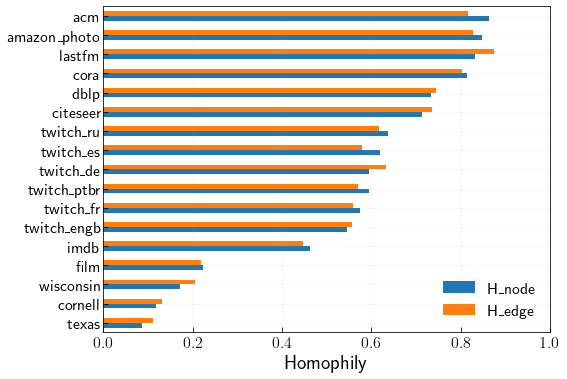

In [37]:
df.sort_values('H_node').plot.barh(x='dataset', y=['H_node', 'H_edge'])
plt.ylabel('')
plt.xlabel('Homophily')
plt.xlim(0, 1)

In [38]:
# df.to_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/homophily_datasets_new_with_metrics.csv", index=False)

1  --  citeseer
2  --  cora
3  --  film
4  --  dblp
5  --  imdb
6  --  acm
7  --  amazon_photo
8  --  cornell
9  --  wisconsin
10  --  texas
11  --  lastfm
12  --  twitch_ru
13  --  twitch_ptbr
14  --  twitch_fr
15  --  twitch_es
16  --  twitch_engb
17  --  twitch_de


Text(0, 0.5, '$\\mathcal{H}_{\\mathrm{edge}}$')

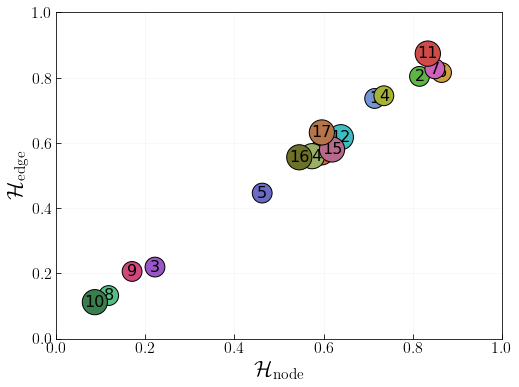

In [39]:
# Example plotting

# Plot as results for each dataset as numbers -- in legend (legend will be created in Inkscape)
datasets = list(range(1, 18))
colors = [
    "#7494d3",
    "#5cb545",
    "#9956c6",
    "#a7b338",
    "#6a6bc6",
    "#d09e40",
    "#ce62bb",
    "#56be85",
    "#d1477d",
    "#397f4d",
    "#cf4b4a",
    "#40bbc1",
    "#d8662c",
    "#99af66",
    "#b76989",
    "#6d7127",
    "#b6744a"
]

for (idx, row), name, c in zip(df.iterrows(), datasets, colors):
    plt.text(row['H_node'], row['H_edge'], name, ha="center", va="center",
             bbox = dict(boxstyle=f"circle,pad=0.15", fc=c), fontsize=16, usetex=False)
    print(name, ' -- ', row['dataset'])
    
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$', fontsize=22)
plt.ylabel(r'$\mathcal{H}_{\mathrm{edge}}$', fontsize=22)

(-0.3147224597136607, 0.6906127602690747)

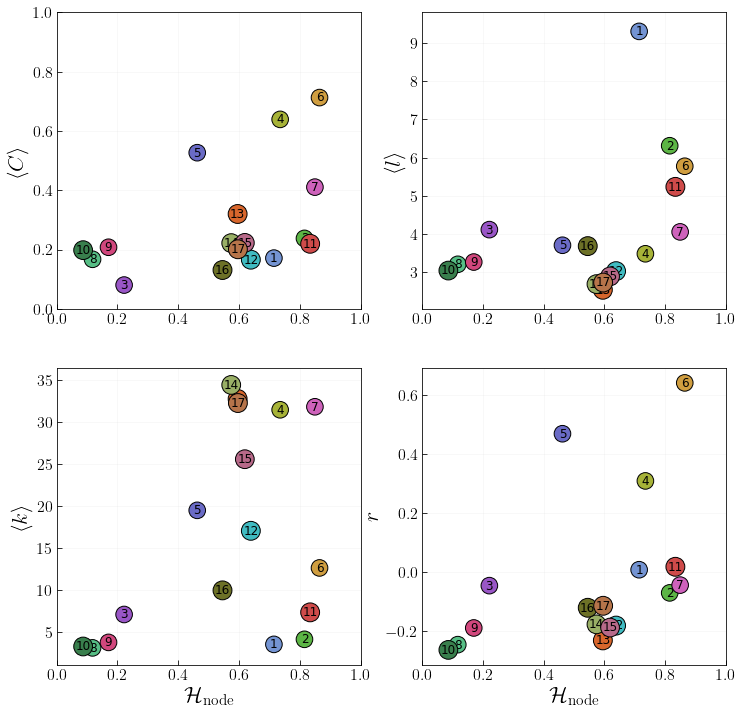

In [57]:
datasets = list(range(1, 18))

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
for (idx, row), name, c in zip(df.iterrows(), datasets, colors):
    plt.text(row['H_node'], row['C'], name, ha="center", va="center",
             bbox = dict(boxstyle=f"circle,pad=0.15", fc=c), fontsize=12, usetex=False)
    
plt.ylabel(r'$\left<C\right>$', fontsize=22)

plt.subplot(2, 2, 2)
for (idx, row), name, c in zip(df.iterrows(), datasets, colors):
    plt.text(row['H_node'], row['l'], name, ha="center", va="center",
             bbox = dict(boxstyle=f"circle,pad=0.15", fc=c), fontsize=12, usetex=False)
    
plt.ylabel(r'$\left<l\right>$', fontsize=22)
plt.ylim(min(df['l'])-0.5, max(df['l'])+0.5)

plt.subplot(2, 2, 3)
for (idx, row), name, c in zip(df.iterrows(), datasets, colors):
    plt.text(row['H_node'], row['k'], name, ha="center", va="center",
             bbox = dict(boxstyle=f"circle,pad=0.15", fc=c), fontsize=12, usetex=False)
    
plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$', fontsize=22)
plt.ylabel(r'$\left<k\right>$', fontsize=22)
plt.ylim(min(df['k'])-2, max(df['k'])+2)

plt.subplot(2, 2, 4)
for (idx, row), name, c in zip(df.iterrows(), datasets, colors):
    plt.text(row['H_node'], row['r'], name, ha="center", va="center",
             bbox = dict(boxstyle=f"circle,pad=0.15", fc=c), fontsize=12, usetex=False)
    

plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$', fontsize=22)
plt.ylabel(r'$r$', fontsize=22)
plt.ylim(min(df['r'])-0.05, max(df['r'])+0.05)